In [7]:
import pandas as pd
import os

local_lang = 'jv'
dfs = {file.split('.')[0] : pd.read_csv(f'dataset/train/full/{file}') for file in  os.listdir('dataset/train/full/') if file.startswith(local_lang)}

In [8]:
from src.utils import balance_topic_distribution

balanced_dfs = {key: balance_topic_distribution(value) for key, value in dfs.items()}

For Agriculture:
jv_llama: 83
jv_rplus: 83
jv_gpt4o: 83
jv_claude: 83
jv_mixtral: 83
jv_gemma2: 83

For Art:
jv_llama: 83
jv_rplus: 87
jv_gpt4o: 83
jv_claude: 83
jv_mixtral: 83
jv_gemma2: 83

For Daily Activities:
jv_llama: 83
jv_rplus: 83
jv_gpt4o: 83
jv_claude: 87
jv_mixtral: 87
jv_gemma2: 83

For Death:
jv_llama: 83
jv_rplus: 83
jv_gpt4o: 83
jv_claude: 83
jv_mixtral: 83
jv_gemma2: 83

For Family Relationships:
jv_llama: 83
jv_rplus: 83
jv_gpt4o: 83
jv_claude: 83
jv_mixtral: 83
jv_gemma2: 83

For Fisheries and Trade:
jv_llama: 83
jv_rplus: 83
jv_gpt4o: 83
jv_claude: 83
jv_mixtral: 83
jv_gemma2: 83

For Food:
jv_llama: 83
jv_rplus: 83
jv_gpt4o: 83
jv_claude: 83
jv_mixtral: 83
jv_gemma2: 83

For Pregnancy and Kids:
jv_llama: 87
jv_rplus: 83
jv_gpt4o: 83
jv_claude: 83
jv_mixtral: 83
jv_gemma2: 83

For Religious Holiday:
jv_llama: 83
jv_rplus: 83
jv_gpt4o: 87
jv_claude: 83
jv_mixtral: 83
jv_gemma2: 83

For Socio-religious aspect of life:
jv_llama: 83
jv_rplus: 83
jv_gpt4o: 83
jv_claude: 

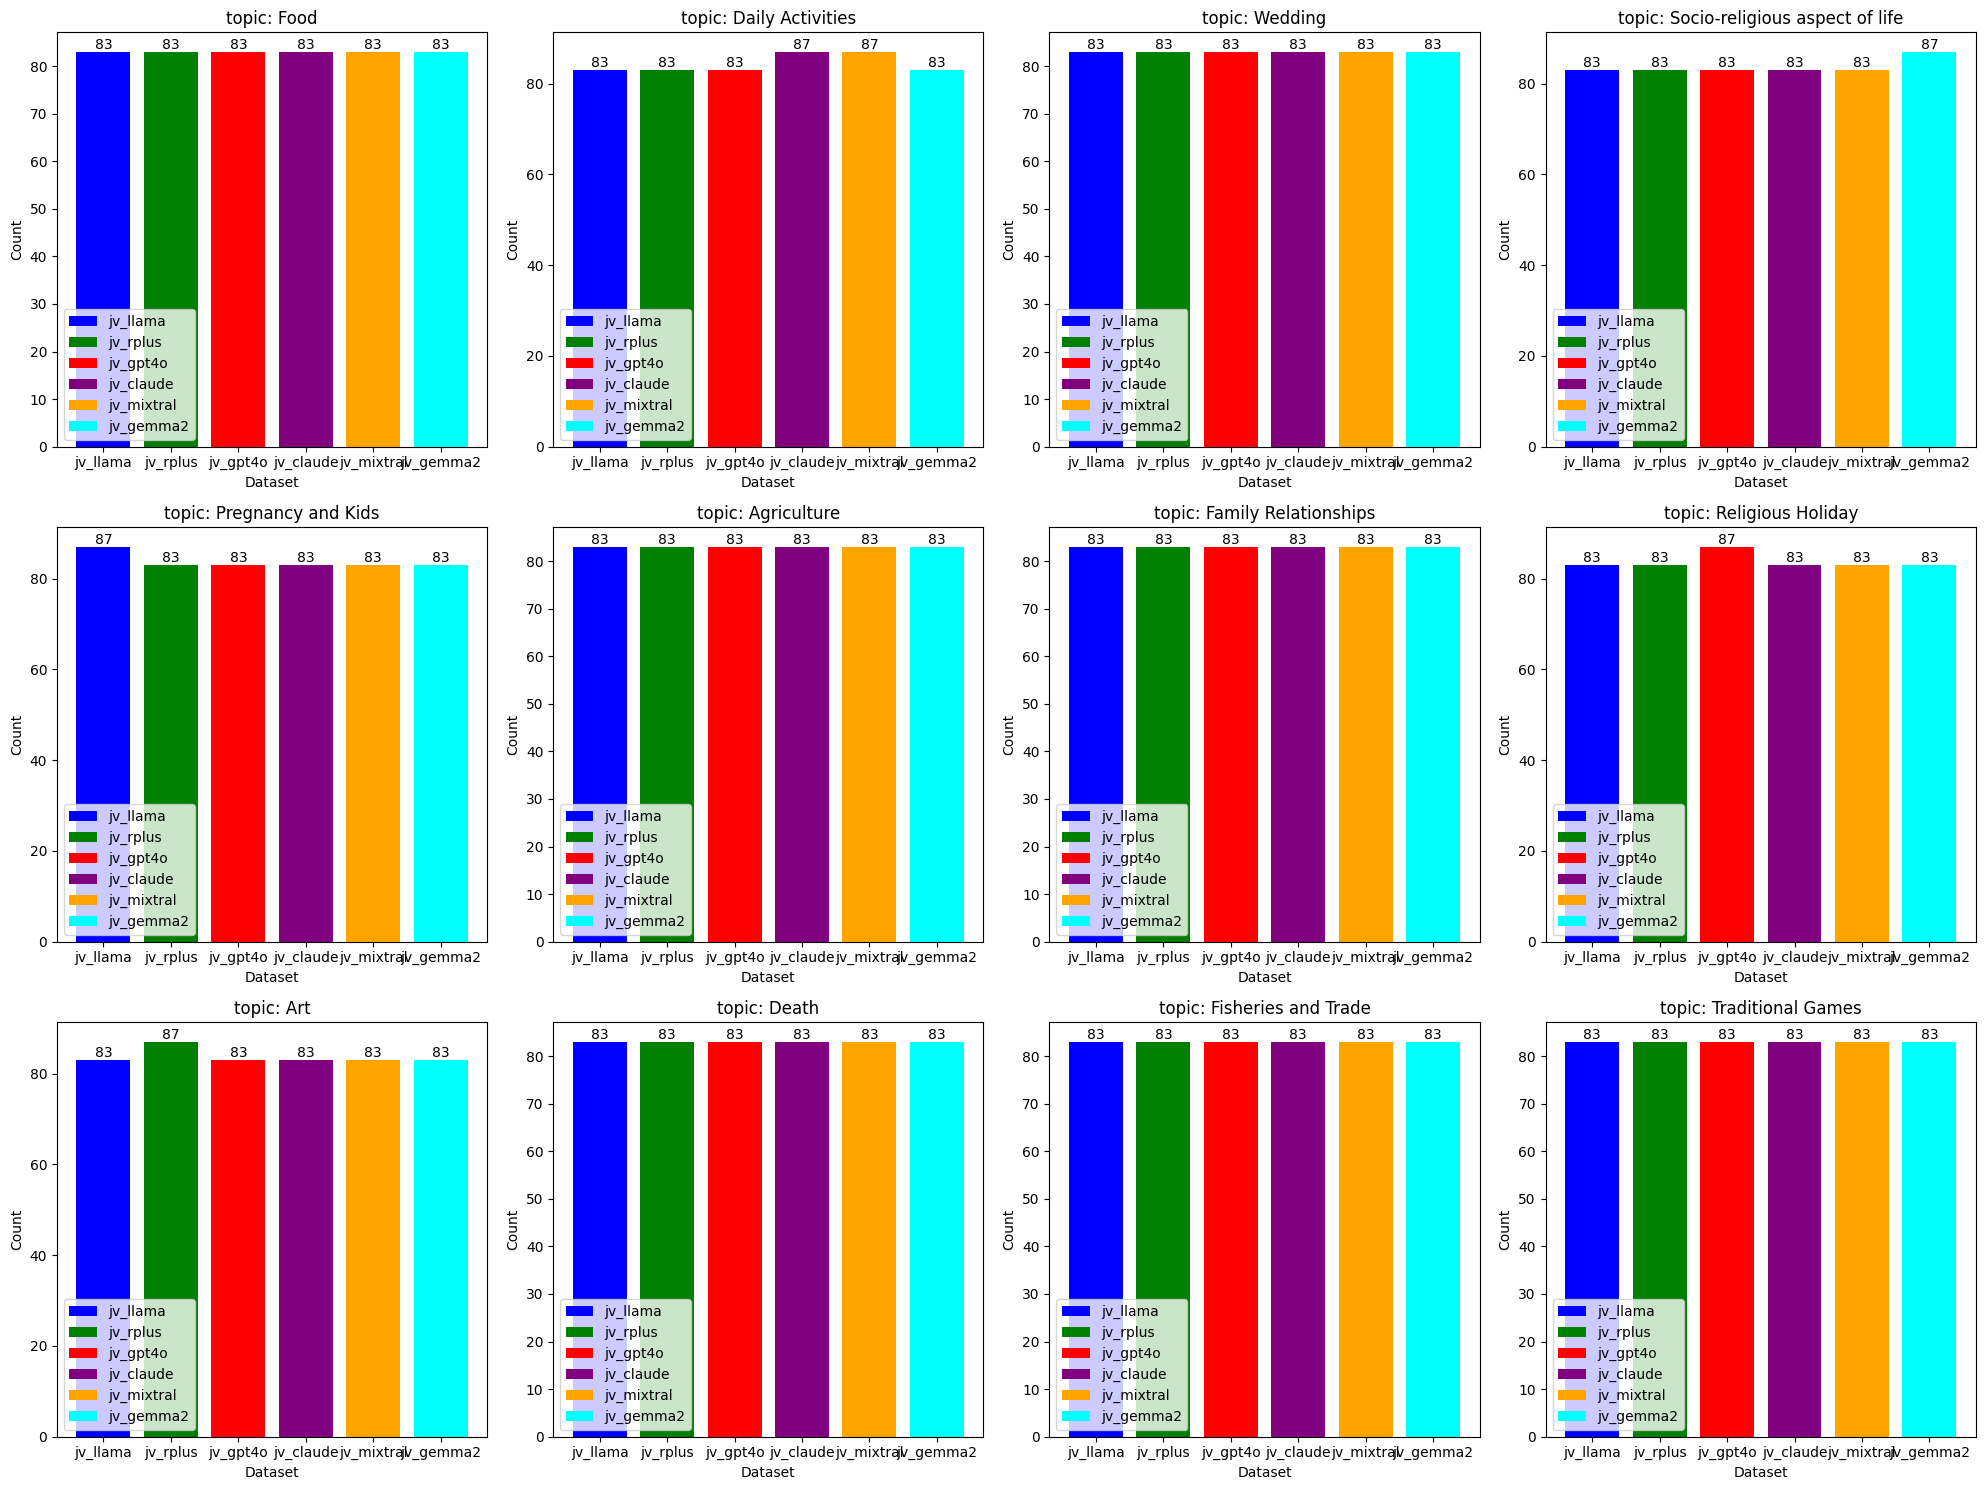

In [9]:
import matplotlib.pyplot as plt

# Combine topic counts for all dfs
all_topics = set()

# Collect all unique topics across dfs
for df_ in balanced_dfs.values():
    all_topics.update(df_['topic'].unique())

# Print counts for each topic
for topic in sorted(all_topics):
    print(f"For {topic}:")
    for label, df_ in balanced_dfs.items():
        count = df_[df_['topic'] == topic].shape[0]
        print(f"{label}: {count}")
    print()

# Set up the figure and axes
fig, axs = plt.subplots(3, 4, figsize=(20, 15))  # Adjust figure size as needed
axs = axs.flatten()  # Flatten the 2D array of axes to make it easier to iterate

# Colors for each DataFrame
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan']

# Plot each topic in separate subplots
for i, topic in enumerate(all_topics):
    for j, (label, df_) in enumerate(balanced_dfs.items()):
        topic_counts = df_[df_['topic'] == topic].shape[0]
        bars = axs[i].bar(label, topic_counts, color=colors[j], label=label)
        
        # Annotate the bar with the count
        for bar in bars:
            yval = bar.get_height()
            axs[i].text(
                bar.get_x() + bar.get_width() / 2, 
                yval, 
                int(yval), 
                ha='center', 
                va='bottom'
            )

    axs[i].set_title(f'topic: {topic}')
    axs[i].set_ylabel('Count')
    axs[i].set_xlabel('Dataset')
    axs[i].legend(loc='best')

# Adjust layout
plt.tight_layout()
plt.show()

# Combine Dataset Per LLM

In [10]:
import pandas as pd
import os

dfs_jv = {file.split('.')[0] : pd.read_csv(f'dataset/train/full/{file}') for file in  os.listdir('dataset/train/full/') if file.startswith('jv')}
dfs_su = {file.split('.')[0] : pd.read_csv(f'dataset/train/full/{file}') for file in  os.listdir('dataset/train/full/') if file.startswith('su')}

In [19]:
for key in dfs_su.keys():
    key = key.split('_')[-1]
    pd.concat([dfs_jv['jv_'+key],dfs_su['su_'+key]], ignore_index=True).to_csv(f'dataset/train/jvsu_{key}.csv', index=False)